In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import gdown
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as DTR, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report, mean_squared_error, r2_score, roc_auc_score

# Examining the dataset

In [ ]:
# Download the CSV file
file_id = '1gRZdhYgticmutKFVWPgFtZvFpgU-LeCf'
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'data.csv'
gdown.download(download_url, output, quiet=False)

# Read the CSV file
spotify_df = pd.read_csv('data.csv')
spotify_df.head(5)

Downloading...
From: https://drive.google.com/uc?id=1gRZdhYgticmutKFVWPgFtZvFpgU-LeCf
To: /content/data.csv
100%|██████████| 29.7M/29.7M [00:00<00:00, 35.6MB/s]


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
spotify_df.describe()

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Pre-processing

In [ ]:
# Check for null values in dataset
spotify_df.isnull().sum()

In [ ]:
# Define features and response variable
X = spotify_df.drop(columns = ["popularity","id","name","artists","release_date"])
Y = spotify_df["popularity"] # ranges from 0-100

In [ ]:
# Convert categorical variables to dummy variables (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=["year", "explicit", "key", "mode"], drop_first=True)

In [ ]:
# Split dataset into training and test sets (70% training, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.3, random_state=12)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [ ]:
# Fit the linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_linear = lin_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_lin = mean_squared_error(Y_test, Y_pred_linear)
r2_lin = r2_score(Y_test, Y_pred_linear)
print(f"Linear Regression:\nMean Squared Error (MSE): {mse_lin:.2f}")
print(f"R-squared: {r2_lin:.4f}")

Linear Regression:
Mean Squared Error (MSE): 100.38
R-squared: 0.7889


In [ ]:
# Get feature importances
lin_feature_importances = np.abs(lin_reg.coef_)

# Create a dataframe for feature importances
lin_reg_df = pd.DataFrame(data=lin_feature_importances, index=X_train.columns, columns=["Importance"])
lin_reg_df = lin_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
lin_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(lin_reg_df)

       Feature  Importance
106  year_2018    6.674297
108  year_2020    6.666208
107  year_2019    6.549254
105  year_2017    6.516362
104  year_2016    5.766132
..         ...         ...
0      valence    0.010810
15   year_1927    0.008090
10   year_1922    0.007581
113      key_4    0.004139
118      key_9    0.000115

[122 rows x 2 columns]


# LASSO

In [ ]:
# Fit the LASSO regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print(f"LASSO Regression:\nMean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.4f}")

LASSO Regression:
Mean Squared Error (MSE): 102.68
R-squared: 0.7841


In [ ]:
# Get feature importances
lasso_feature_importances = np.abs(lasso_reg.coef_)

# Create a dataframe for feature importances
lasso_reg_df = pd.DataFrame(data=lasso_feature_importances, index=X_train.columns, columns=["Importance"])
lasso_reg_df = lasso_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
lasso_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(lasso_reg_df)

      Feature  Importance
28  year_1940    3.244684
18  year_1930    3.193399
36  year_1948    3.114703
33  year_1945    3.112277
38  year_1950    3.068246
..        ...         ...
63  year_1975    0.000000
65  year_1977    0.000000
66  year_1978    0.000000
68  year_1980    0.000000
4      energy    0.000000

[122 rows x 2 columns]


# Ridge

In [ ]:
# Fit the Ridge regression
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print(f"Ridge Regression:\nMean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.4f}")

Ridge Regression:
Mean Squared Error (MSE): 100.38
R-squared: 0.7889


In [ ]:
# Get feature importances
ridge_feature_importances = np.abs(ridge_reg.coef_)

# Create a dataframe for feature importances
ridge_reg_df = pd.DataFrame(data=ridge_feature_importances, index=X_train.columns, columns=["Importance"])
ridge_reg_df = ridge_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
ridge_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(ridge_reg_df)

       Feature  Importance
106  year_2018    6.388033
108  year_2020    6.385585
107  year_2019    6.276452
105  year_2017    6.240453
104  year_2016    5.503831
..         ...         ...
39   year_1951    0.014451
25   year_1937    0.014439
0      valence    0.009080
113      key_4    0.004277
118      key_9    0.000456

[122 rows x 2 columns]


# Elastic Net

In [ ]:
# Fit the Elastic Net regression
net_reg = ElasticNet(alpha=0.1, l1_ratio=0.75)
net_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_net = net_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_net = mean_squared_error(Y_test, Y_pred_net)
r2_net = r2_score(Y_test, Y_pred_net)
print(f"Elastic Net Regression:\nMean Squared Error (MSE): {mse_net:.2f}")
print(f"R-squared: {r2_net:.4f}")

Elastic Net Regression:
Mean Squared Error (MSE): 103.21
R-squared: 0.7830


In [ ]:
# Get feature importances
net_feature_importances = np.abs(net_reg.coef_)

# Create a dataframe for feature importances
net_reg_df = pd.DataFrame(data=net_feature_importances, index=X_train.columns, columns=["Importance"])
net_reg_df = net_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
net_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(net_reg_df)

         Feature  Importance
28     year_1940    3.032600
18     year_1930    2.989813
107    year_2019    2.946351
108    year_2020    2.944746
33     year_1945    2.911440
..           ...         ...
110        key_1    0.000000
3    duration_ms    0.000000
4         energy    0.000000
60     year_1972    0.000000
9          tempo    0.000000

[122 rows x 2 columns]


# Regression Tree

In [ ]:
# Fit the regression tree
tree_reg = DTR(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=12)
tree_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_tree = tree_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)
print(f"Regression Tree:\nMean Squared Error (MSE): {mse_tree:.2f}")
print(f"R-squared: {r2_tree:.4f}")

Regression Tree:
Mean Squared Error (MSE): 201.89
R-squared: 0.5755


In [ ]:
# Get feature importances from the regression tree
tree_feature_importances = tree_reg.feature_importances_

# Create a dataframe for feature importances
tree_reg_df = pd.DataFrame(data=tree_feature_importances, index=X_train.columns, columns=["Importance"])
tree_reg_df = tree_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
tree_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(tree_reg_df)

          Feature  Importance
1    acousticness    0.580977
8     speechiness    0.129267
7        loudness    0.086501
3     duration_ms    0.027463
109    explicit_1    0.027144
..            ...         ...
51      year_1963    0.000000
50      year_1962    0.000000
48      year_1960    0.000000
47      year_1959    0.000000
61      year_1973    0.000000

[122 rows x 2 columns]


# Bagged Forest

In [ ]:
# Fit the bagged forest
bag_reg = BaggingRegressor(n_estimators=10, random_state=12)
bag_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_bag = bag_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_bag = mean_squared_error(Y_test, Y_pred_bag)
r2_bag = r2_score(Y_test, Y_pred_bag)
print(f"Bagged Forest:\nMean Squared Error (MSE): {mse_bag:.2f}")
print(f"R-squared: {r2_bag:.4f}")

Bagged Forest:
Mean Squared Error (MSE): 131.49
R-squared: 0.7235


In [ ]:
# Get feature importances from one of the base estimators in the bagged forest
bag_feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_reg.estimators_
], axis=0)

# Create a dataframe for feature importances
bag_reg_df = pd.DataFrame(data=bag_feature_importances, index=X_train.columns, columns=["Importance"])
bag_reg_df = bag_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
bag_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(bag_reg_df)

         Feature  Importance
1   acousticness    0.365580
8    speechiness    0.098379
7       loudness    0.073386
3    duration_ms    0.041363
0        valence    0.033648
..           ...         ...
17     year_1929    0.000603
11     year_1923    0.000282
12     year_1924    0.000277
13     year_1925    0.000266
10     year_1922    0.000076

[122 rows x 2 columns]


# Random Forest

In [ ]:
# Fit the random forest
rand_reg = RandomForestRegressor(n_estimators=10, random_state=12)
rand_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_rand = rand_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_rand = mean_squared_error(Y_test, Y_pred_rand)
r2_rand = r2_score(Y_test, Y_pred_rand)
print(f"Random Forest:\nMean Squared Error (MSE): {mse_rand:.2f}")
print(f"R-squared: {r2_rand:.4f}")

Random Forest:
Mean Squared Error (MSE): 131.76
R-squared: 0.7229


In [ ]:
# Get feature importances
np.sum(rand_reg.feature_importances_)

# Create dataframe for feature
rand_reg_df = pd.DataFrame(data=rand_reg.feature_importances_, index=X_train.columns, columns=["Importance"])
rand_reg_df = rand_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
rand_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(rand_reg_df)

         Feature  Importance
1   acousticness    0.365617
8    speechiness    0.098239
7       loudness    0.073348
3    duration_ms    0.041370
0        valence    0.033723
..           ...         ...
17     year_1929    0.000608
11     year_1923    0.000276
12     year_1924    0.000269
13     year_1925    0.000266
10     year_1922    0.000075

[122 rows x 2 columns]


# XGBoost

In [ ]:
# Fit the XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3, random_state=12)
xgb_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Calculate MSE and R^2
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)
print(f"XGBoost Regressor:\nMean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared: {r2_xgb:.4f}")

XGBoost Regressor:
Mean Squared Error (MSE): 94.52
R-squared: 0.8012


In [ ]:
# Get feature importances from the XGBoost model
xgb_feature_importances = xgb_reg.feature_importances_

# Create a dataframe for feature importances
xgb_reg_df = pd.DataFrame(data=xgb_feature_importances, index=X_train.columns, columns=["Importance"])
xgb_reg_df = xgb_reg_df.reset_index().rename(columns={"index": "Feature"})

# Sort values by importance in descending order and print
xgb_reg_df.sort_values(by="Importance", ascending=False, inplace=True)
print(xgb_reg_df)

          Feature  Importance
105     year_2017    0.049429
1    acousticness    0.037931
106     year_2018    0.033682
104     year_2016    0.030921
107     year_2019    0.028132
..            ...         ...
73      year_1985    0.000418
113         key_4    0.000401
117         key_8    0.000373
110         key_1    0.000360
119        key_10    0.000316

[122 rows x 2 columns]


Discuss the accuracy of your methods, both on testing and training data. Is any method clearly superior? What does this say about the linear nature of your data?

Linear Rigression (with r-squared = .79, and MSE=100.38) and Ridge (with r-squared = .79, MSE = 100.38) fit well our model.
XGBoost is the most performing out of all the other methods (with a r-squared = .80, MSE= 94.52)
Beside of XGBoost, the other tree based methods did not perform well on the model. We conclude that our model is linear.

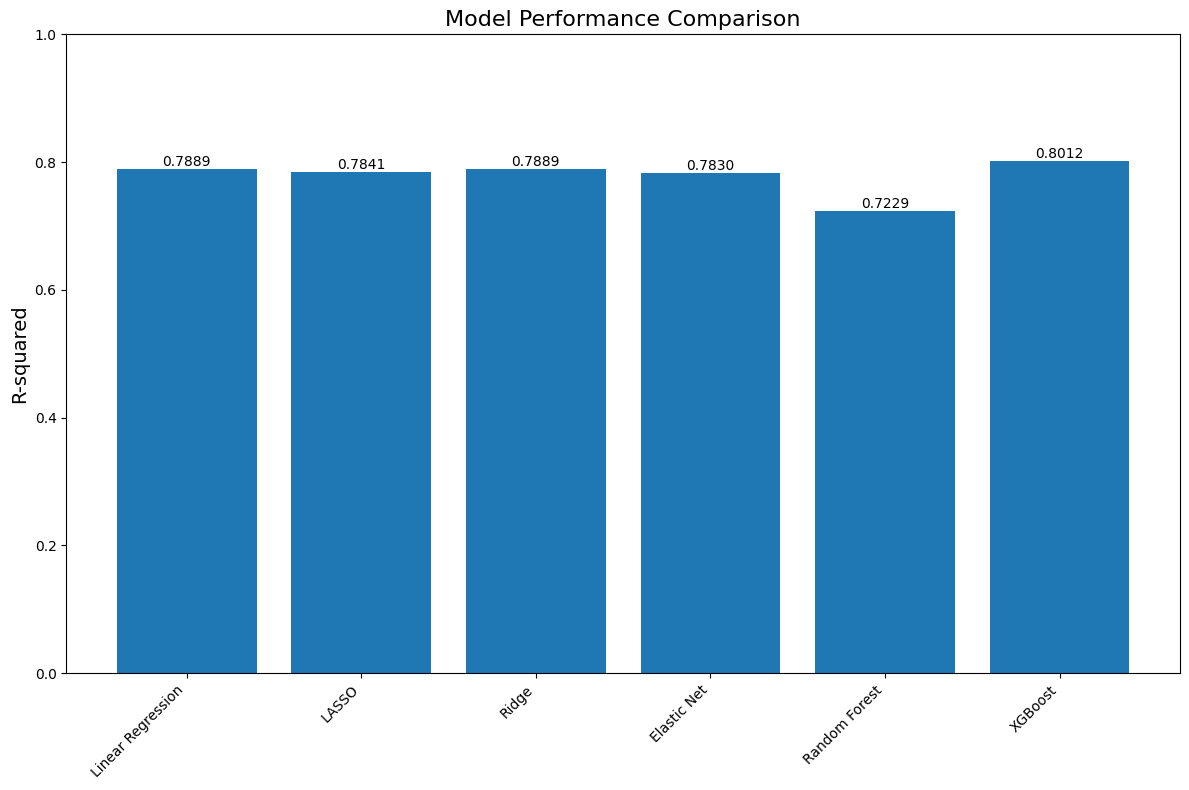

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'LASSO', 'Ridge', 'Elastic Net', 'Random Forest', 'XGBoost']
r_squared = [r2_lin, r2_lasso, r2_ridge, r2_net, r2_rand, r2_xgb]

plt.figure(figsize=(12, 8))
bars = plt.bar(models, r_squared)
plt.ylabel('R-squared', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 It shows that XGBoost slightly outperforms other models, while linear models (Linear Regression, Ridge) perform nearly as well, suggesting a largely linear relationship between features and popularity.

### **Data Visualization**

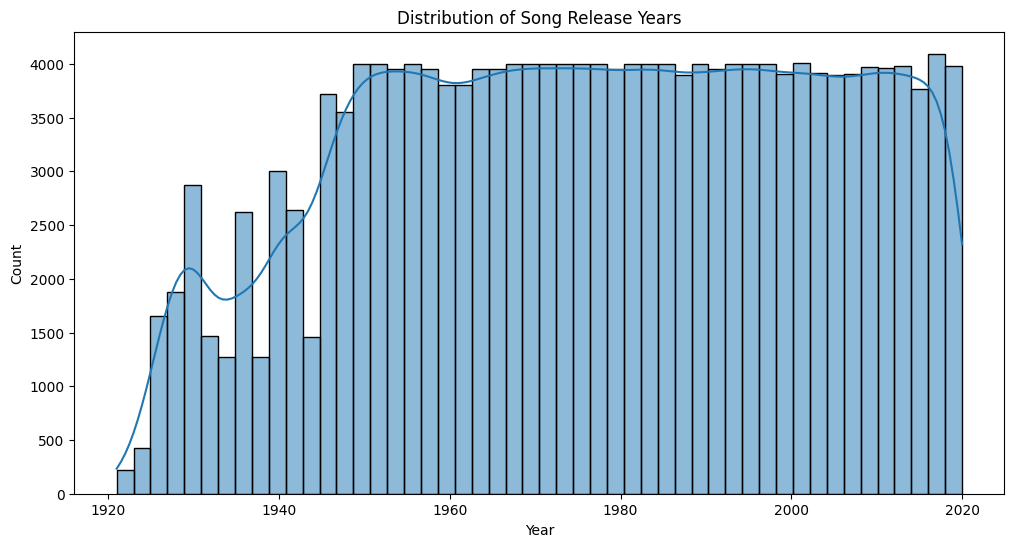

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify_df, x='year', bins=50, kde=True)
plt.title('Distribution of Song Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

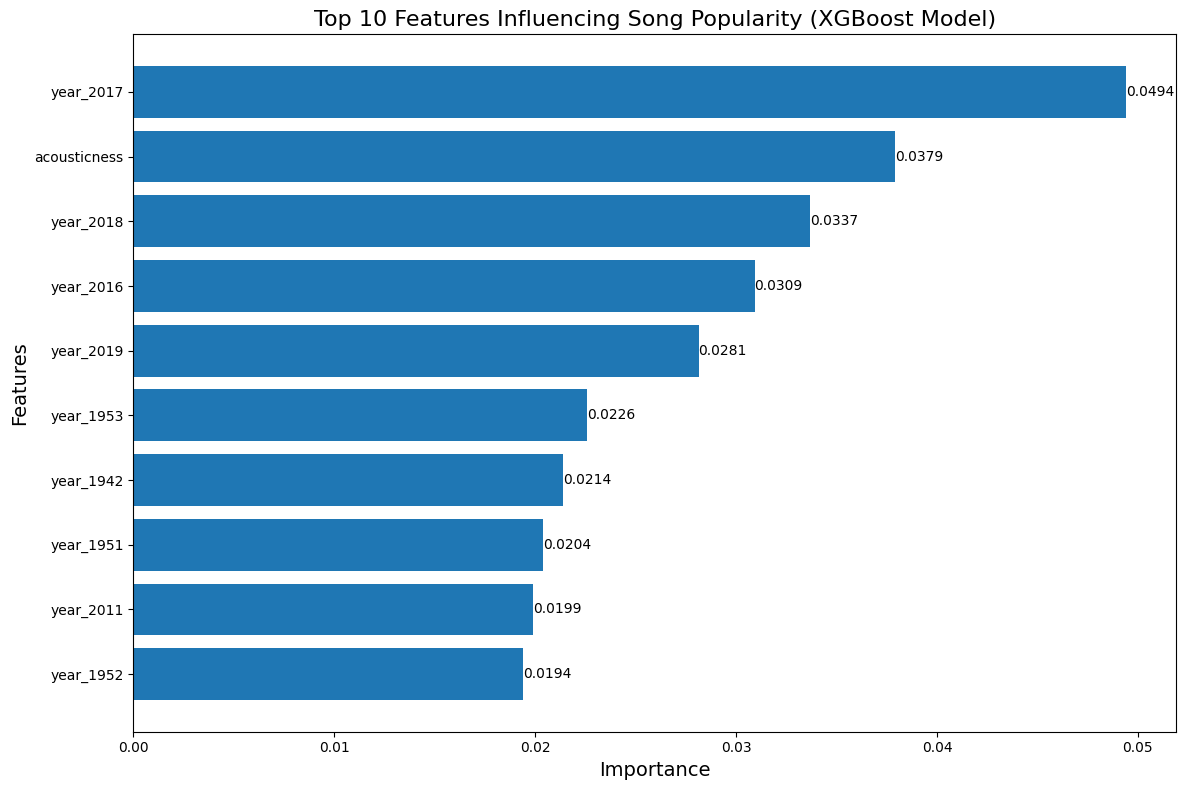

In [ ]:
import matplotlib.pyplot as plt

top_10_features = xgb_reg_df.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Features Influencing Song Popularity (XGBoost Model)', fontsize=16)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

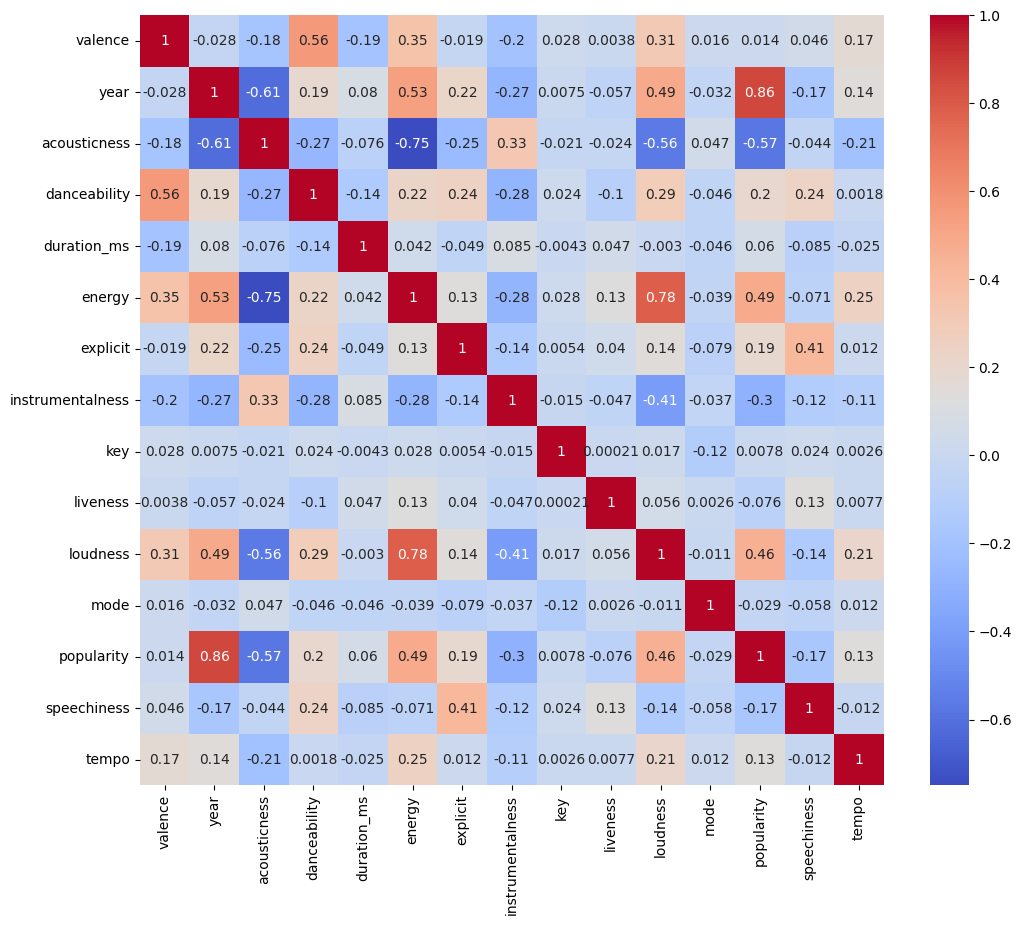

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = spotify_df.drop(columns = ["id","name","artists","release_date"])
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Interpretation: This heatmap shows that the most important features affecting popularity are year, acousticness, energy, and loudness. This also aligns with some of the regression model's feature importances from part 3. Because of this, we decided to create scatterplots for both year vs. popularity and acousticness vs. popularity.

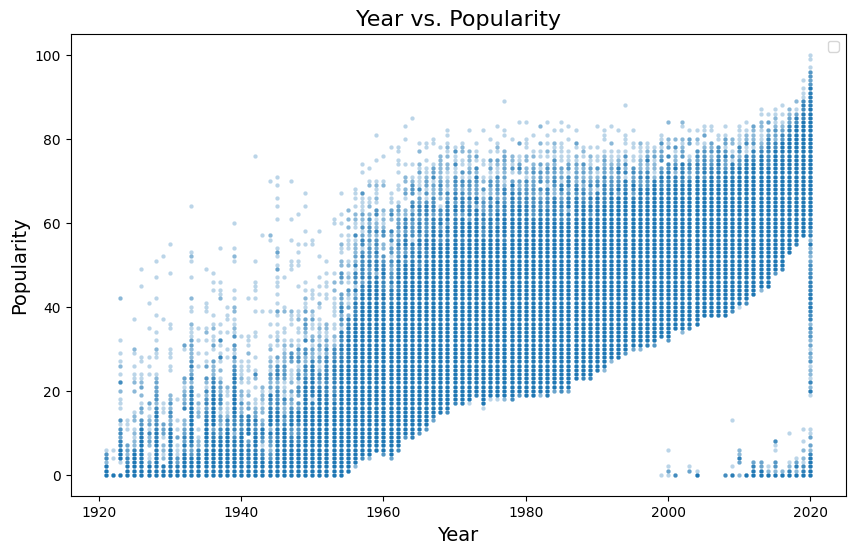

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='popularity', s=10, alpha=0.3)
plt.title('Year vs. Popularity', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.show()

Interpretation: This scatter plot of "Year vs. Popularity" suggests a general increase in song popularity over time. Songs from the 1920s to the 1940s show relatively low popularity scores, while songs released from the 1960s onward display a broader range of popularity. Notably, songs from recent decades have many entries across the entire popularity scale, with some songs reaching very high popularity scores, especially after 2000. This could reflect modern listeners’ tendency to favor more recent music or the impact of digital platforms that amplify recent songs.

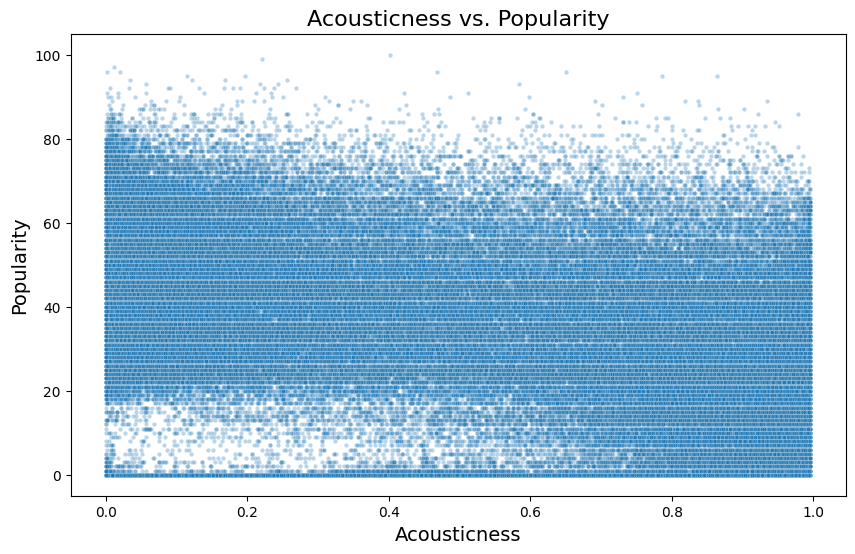

In [ ]:
# Pratham(Part4)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='acousticness', y='popularity', s=10, alpha=0.3)
plt.title('Acousticness vs. Popularity', fontsize=16)
plt.xlabel('Acousticness', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.show()

Interpretation: When looking at the scatterplot for acousticness vs. popularity, it isn't as interpretable as year was. However, there is a noticeable downwards trend; as acoustiness increases, popularity seems to decrease. Acousticness (defined by Spotify) is the "absence of electrical modifications in a track," so the results imply that listeners tend to favor electrical modifications in songs.